<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

## Betting Against Beta
1. Read the Nifty component stock list
2. Read the price data of the stocks
3. Calculate the beta
3. Generate signals and calculate strategy returns
4. Generate the signal based on beta and ROE
5. Compute portfolio returns
6. Returns analysis

## Read the Nifty stock list and details

In [1]:
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import pandas as pd
import numpy as np
nifty_list = pd.read_csv('ind_nifty50list.csv')
nifty_list.head(3)

,Company Name,Industry,Symbol,Series,ISIN Code,ROE
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042,16.3
1,Ambuja Cements Ltd.,CEMENT & CEMENT PRODUCTS,AMBUJACEM,EQ,INE742F01042,10.0
2,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026,22.7


## Read the price data of each of the 50 stocks stored in the CSV file

In [2]:
import pandas as pd
data = pd.read_csv('nifty_stocks_prices.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data.tail(3)

,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-14,755.400024,432.450012,3362.500000,748.049988,794.400024,3751.050049,7417.549805,457.874969,694.200012,246.250000,...,306.100006,1452.300049,1452.050049,752.500000,7856.450195,303.200012,673.450012,12.45,261.549988,17380.000000
2021-09-15,765.950012,437.049988,3352.300049,759.000000,791.400024,3779.100098,7414.149902,454.950012,725.500000,244.550003,...,311.950012,1455.099976,1464.849976,762.099976,7820.850098,307.200012,674.049988,12.70,255.899994,17519.449219
2021-09-16,769.650024,430.200012,3342.100098,754.750000,802.599976,3813.500000,7411.500000,439.049988,718.599976,269.350006,...,311.649994,1436.750000,1448.349976,754.000000,7765.450195,309.100006,667.849976,14.70,247.149994,17629.500000


## Daily percentage change

In [3]:
# Calculate the percentage change for each stock
data_pct_change = data.pct_change().dropna()
data_pct_change.tail(3)

,ADANIPORTS,AMBUJACEM,ASIANPAINT,AUROPHARMA,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BPCL,BHARTIARTL,INDUSTOWER,...,TATAMOTORS,TATASTEEL,TECHM,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-14,0.013824,-0.008711,-0.001351,0.016165,0.007674,0.013921,-0.003761,-0.010038,0.001298,0.030982,...,0.016268,-0.007619,0.015775,-0.004630,-0.011077,-0.017339,0.004025,0.121622,0.399786,0.001423
2021-09-15,0.013966,0.010637,-0.003033,0.014638,-0.003776,0.007478,-0.000458,-0.006388,0.045088,-0.006904,...,0.019111,0.001928,0.008815,0.012757,-0.004531,0.013193,0.000891,0.020080,-0.021602,0.008024
2021-09-16,0.004831,-0.015673,-0.003043,-0.005599,0.014152,0.009103,-0.000357,-0.034949,-0.009511,0.101411,...,-0.000962,-0.012611,-0.011264,-0.010628,-0.007084,0.006185,-0.009198,0.157480,-0.034193,0.006282


---
## Calculate Beta

In [4]:
import statsmodels.api as sm
def calc_beta(y,x):
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params[0]

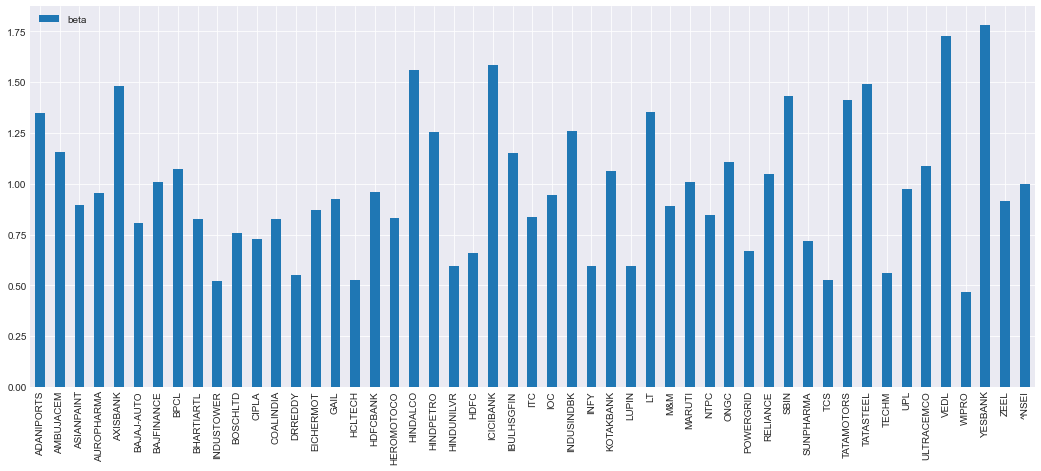

In [5]:
beta = pd.DataFrame(index=[0])
for ticker in data_pct_change.columns:
    beta[ticker] = calc_beta(data_pct_change.loc[:'2017',ticker],data_pct_change.loc[:'2017','^NSEI'])
beta = beta.T
beta.columns = ['beta']

bar_p = beta.plot.bar(figsize=(18,7))

plt.show()

## Alpha 1: Beta < 0.7

In [6]:
low_beta = beta[beta.values < 0.7].index
low_beta

Index(['INDUSTOWER', 'DRREDDY', 'HCLTECH', 'HINDUNILVR', 'HDFC', 'INFY',
       'LUPIN', 'POWERGRID', 'TCS', 'TECHM', 'WIPRO'],
      dtype='object')

In [7]:
def plot_performance(stock_list, strategy_name):
    stk_returns = data_pct_change.loc['2018':, stock_list]
    (stk_returns+1).cumprod().plot(figsize=(15,7),legend="left")
    plt.title(strategy_name)
    plt.show()

    nifty = data_pct_change.loc['2018':, '^NSEI']
    portfolio = stk_returns.mean(axis=1)
    plt.title(strategy_name + ' Portfolio Performance')
    (portfolio+1).cumprod().plot(figsize=(15,7),label=strategy_name, color='purple')
    (nifty+1).cumprod().plot(figsize=(15,7),label='Nifty', color='blue')
    plt.legend()
    plt.show()
    return portfolio

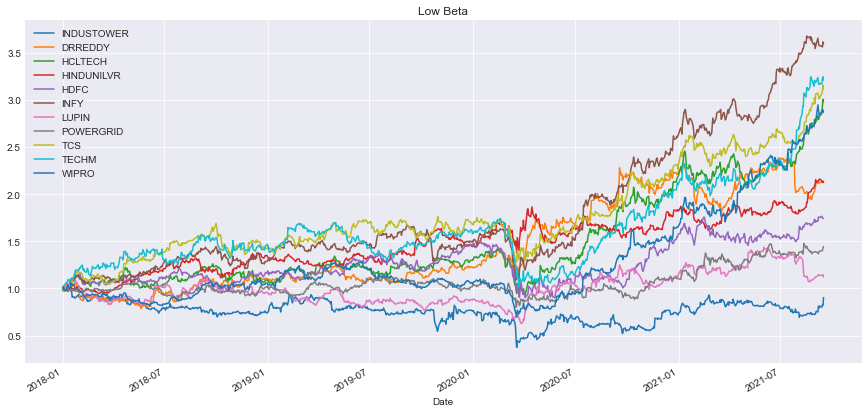

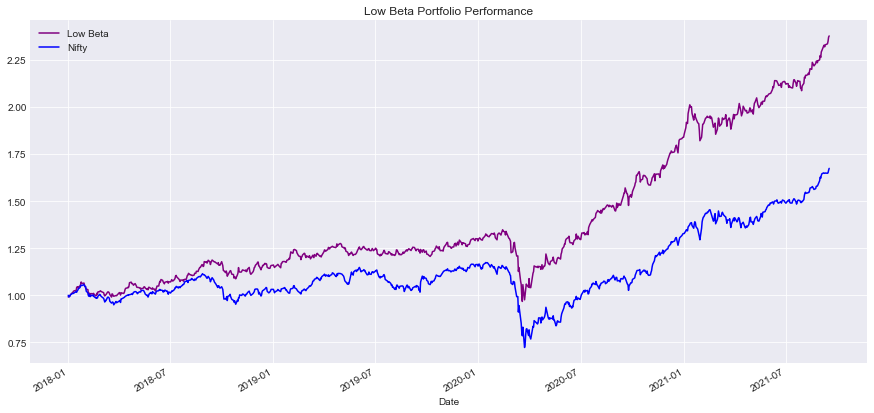

In [8]:
p = plot_performance(low_beta, 'Low Beta')

---
## Alpha 2: ROE > 18

In [9]:
high_roe = nifty_list[nifty_list.ROE>18].Symbol.values
high_roe

array(['ASIANPAINT', 'AUROPHARMA', 'BAJAJ-AUTO', 'BAJFINANCE', 'BPCL',
       'COALINDIA', 'EICHERMOT', 'HCLTECH', 'HEROMOTOCO', 'HINDPETRO',
       'HINDUNILVR', 'IBULHSGFIN', 'ITC', 'INFY', 'TCS', 'TECHM'],
      dtype=object)

In [10]:
filtered_stocks = low_beta & high_roe
filtered_stocks

Index(['HCLTECH', 'HINDUNILVR', 'INFY', 'TCS', 'TECHM'], dtype='object')

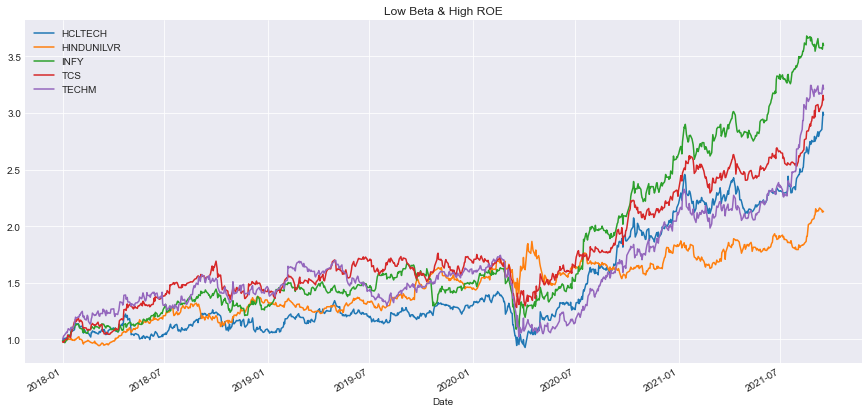

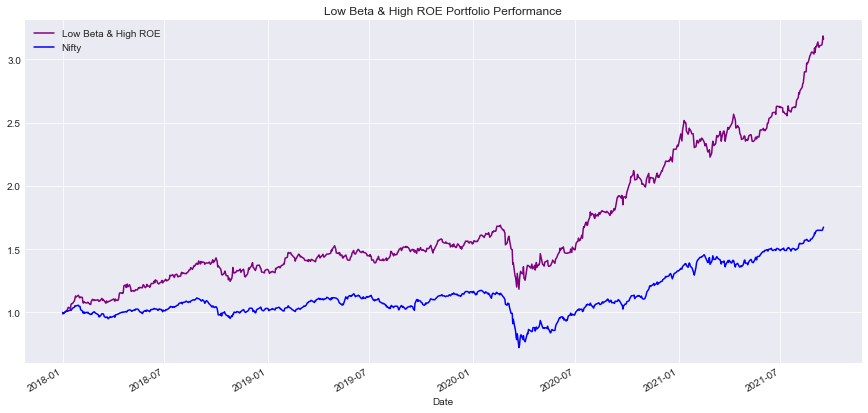

In [11]:
portfolio = plot_performance(filtered_stocks, 'Low Beta & High ROE')

<div class="alert alert-block alert-danger">
    <b>Pro Tip</b>: Don't try to over optimize the beta and ROE threshold as it will lead to overfitting and reduce the predictive value of your strategy.
</div>

---
## Detailed Performance Analysis

Start date,2018-01-01
End date,2021-09-16
Total months,43
,Backtest
Annual return,37.4%
Cumulative returns,216.0%
Annual volatility,21.8%
Sharpe ratio,1.56
Calmar ratio,1.25
Stability,0.86
Max drawdown,-29.9%


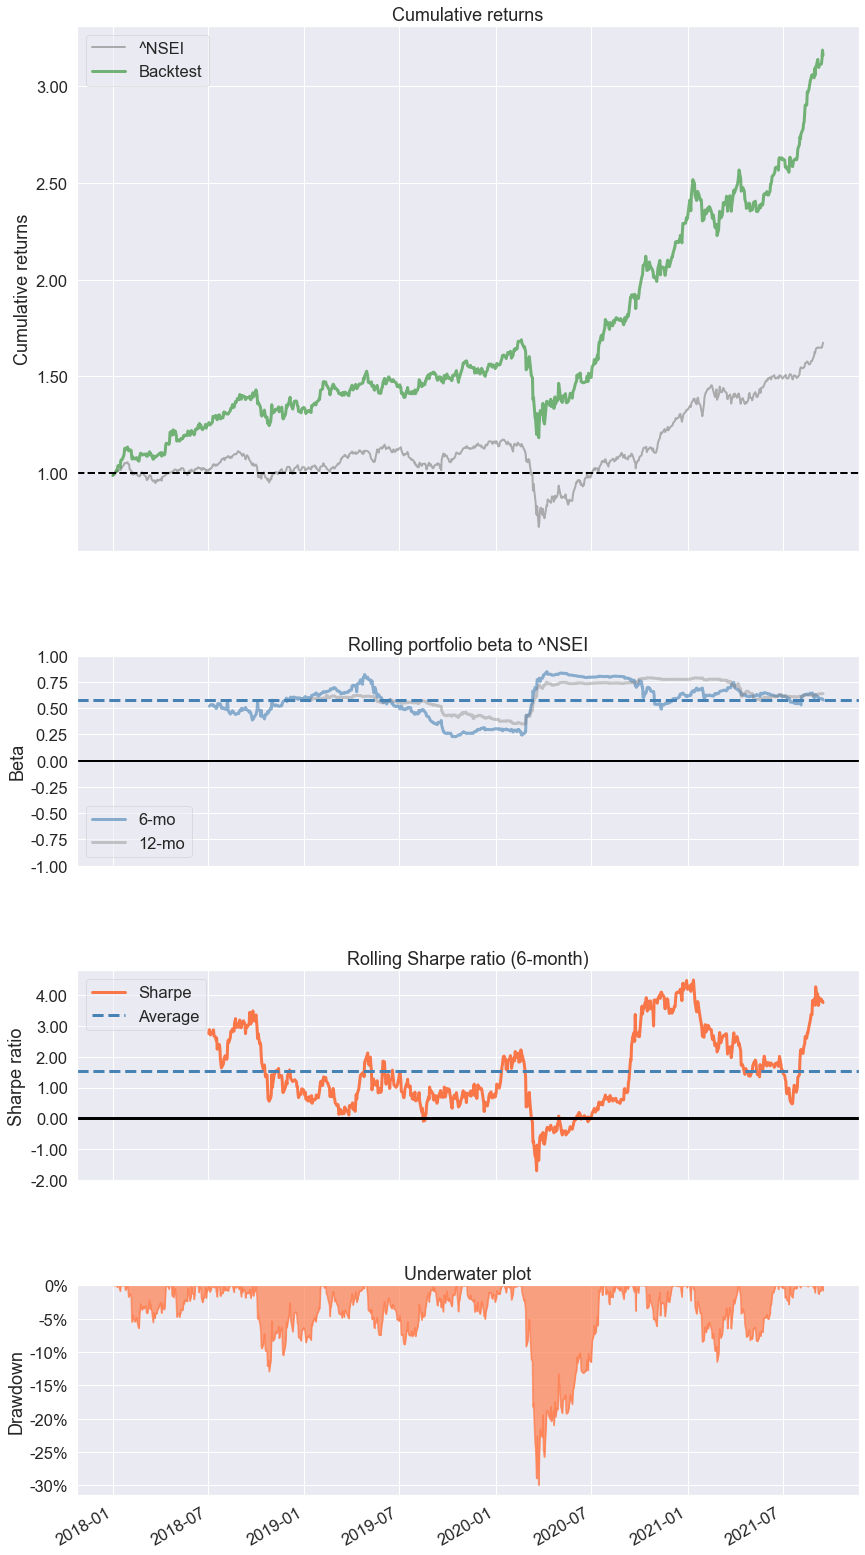

In [12]:
import pyfolio as pf
pf.create_simple_tear_sheet(portfolio,benchmark_rets=data_pct_change.loc['2018':, '^NSEI'])

<div class="alert alert-block alert-success">
    <h2> Further Improvements </h2><BR>
    1. Rebalance the portfolio on monthly or quarterly basis.<BR>
    2. Backtest the strategy on different markets such as US equities, local equities, bond markets.<BR>
    3. Add more fundamental factors such as ROCE, Debt to Equity to include good quality stocks in your portfolio.
    

## References
1. [Betting Against Beta](https://www.sciencedirect.com/science/article/pii/S0304405X13002675)
2. [Quality Minus Junk](https://link.springer.com/article/10.1007/s11142-018-9470-2)
2. Nifty50 Historical Constituents Data: [Market cap and Weightage Report](https://www1.nseindia.com/products/content/equities/indices/archieve_indices.htm)
3. Screener.in
<BR><BR>